# AlexNet
Here we will try to write the code of a famous Convolutional Neural Network "AlexNet". We will be using Tensor Flow to replicate it.

***Buliding AlexNet.***

In [1]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop,Adam

Creating a Function for AlexNet

In [0]:
def AlexNet(classes):

    # Our input feature map is 227x227x3: 227x227 for the image pixels, and 3 for the three color channels: R, G, and B
    img_input = layers.Input(shape=(227, 227, 3))

    # First Convolution extracts 96 filters that are 11x11
    # Convolution is followed by max-pooling layer with a 3x3 window
    x = layers.Conv2D(96, 11, strides = (4,4), activation='relu')(img_input)
    x = layers.MaxPooling2D(pool_size = (3,3), strides = (2, 2))(x)
    x = layers.BatchNormalization()(x)

    # Second Convolution extracts 256 filters that are 5x5
    # Convolution is followed by max-pooling layer with a 3x3 window
    x = layers.Conv2D(256, 5, strides = (1,1), activation='relu')(x)
    x = layers.MaxPooling2D(pool_size = (3,3), strides = (2,2))(x)
    x = layers.BatchNormalization()(x)

    # Third Convolution extracts 384 filters that are 3x3
    x = layers.Conv2D(384,3, strides = (1,1), activation='relu')(x)
    x = layers.BatchNormalization()(x)

    # Fourth Convolution extracts 384 filters that are 3x3
    x = layers.Conv2D(384,3, strides = (1,1), activation='relu')(x)
    x = layers.BatchNormalization()(x)

    # Fifth Convolution extracts 256 filters that are 3x3
    # Convolution is followed by max-pooling layer with a 3x3 window
    x = layers.Conv2D(256,3, strides = (1,1), activation='relu')(x)
    x = layers.MaxPooling2D(pool_size = (3,3), strides = (2,2))(x)
    x = layers.BatchNormalization()(x)

    x = layers.Flatten()(x)

    x = layers.Dense(4096, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(4096, activation='relu')(x)
    #x = layers.BatchNormalization()(x)

    #if classes == 2:
    #    output = output = layers.Dense(1, activation='sigmoid')(x)
    #else:
    output = layers.Dense(classes, activation='softmax')(x)

    # Creating Model and printing its Summary
    model = Model(img_input, output)
    print(model.summary())

    return model

Our Model is complete.Lets see its summary

In [42]:
model = AlexNet(2)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 11, 11, 256)       1024

# Image Classification using AlexNet

Let's start by using dataset in out PC which contains images of Cats and Dog

In [17]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-12-27 15:35:45--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 2404:6800:4003:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   267MB/s    in 0.2s    

2019-12-27 15:35:46 (267 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

Now, let's see what the filenames look like in the cats and dogs train directories (file naming conventions are the same in the validation directory):

In [20]:
train_cat_fnames = os.listdir(train_cats_dir)
print (train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print (train_dog_fnames[:10])

['cat.449.jpg', 'cat.299.jpg', 'cat.17.jpg', 'cat.370.jpg', 'cat.835.jpg', 'cat.819.jpg', 'cat.177.jpg', 'cat.27.jpg', 'cat.687.jpg', 'cat.35.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [21]:
classes = len(os.listdir(train_dir))
print ('total training cat images:', len(os.listdir(train_cats_dir)))
print ('total training dog images:', len(os.listdir(train_dogs_dir)))
print ('total validation cat images:', len(os.listdir(validation_cats_dir)))
print ('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


Now let's take a look at a few pictures to get a better sense of what the cat and dog datasets look like. First, configure the matplot parameters:

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 cat and 8 dog pictures. You can rerun the cell to see a fresh batch each time:

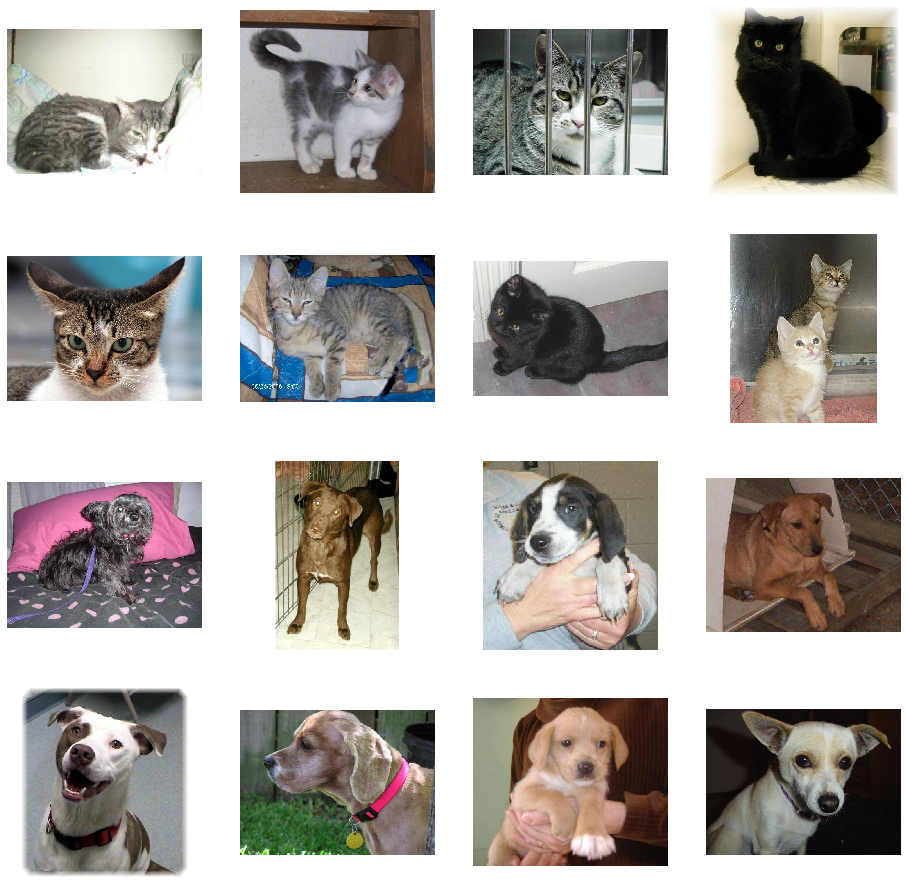

In [23]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


The "output shape" column shows how the size of your feature map evolves in each successive layer. The convolution layers reduce the size of the feature maps by a bit due to padding, and each pooling layer halves the feature map.

Next, we'll configure the specifications for model training. We will train our model with the binary_crossentropy loss, because it's a binary classification problem and our final activation is a sigmoid. (For a refresher on loss metrics, see the Machine Learning Crash Course.) We will use the rmsprop optimizer with a learning rate of 0.001. During training, we will want to monitor classification accuracy.

NOTE: In this case, using the RMSprop optimization algorithm is preferable to stochastic gradient descent (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as Adam and Adagrad, also automatically adapt the learning rate during training, and would work equally well here.)



In [0]:
from tensorflow.keras.optimizers import RMSprop,Adam

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

**Data Preprocessing**

Let's set up data generators that will read pictures in our source folders, convert them to float32 tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of 20 images of size 150x150 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range).

In Keras this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory). These generators can then be used with the Keras model methods that accept data generators as inputs: fit_generator, evaluate_generator, and predict_generator.




In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(227, 227),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(227, 227),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [44]:
Result = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/20
Epoch 1/20
100/100 - 11s - loss: 3.9580 - acc: 0.5390 - val_loss: 0.8002 - val_acc: 0.5580
Epoch 2/20
Epoch 1/20
100/100 - 9s - loss: 0.8342 - acc: 0.5655 - val_loss: 0.7238 - val_acc: 0.5920
Epoch 3/20
Epoch 1/20
100/100 - 9s - loss: 0.7218 - acc: 0.5900 - val_loss: 0.6968 - val_acc: 0.5910
Epoch 4/20
Epoch 1/20
100/100 - 9s - loss: 0.8167 - acc: 0.5965 - val_loss: 0.7658 - val_acc: 0.5030
Epoch 5/20
Epoch 1/20
100/100 - 9s - loss: 0.7758 - acc: 0.6085 - val_loss: 0.8020 - val_acc: 0.5570
Epoch 6/20
Epoch 1/20
100/100 - 9s - loss: 0.7500 - acc: 0.6340 - val_loss: 1.0848 - val_acc: 0.5340
Epoch 7/20
Epoch 1/20
100/100 - 9s - loss: 0.7244 - acc: 0.6535 - val_loss: 0.8131 - val_acc: 0.6170
Epoch 8/20
Epoch 1/20
100/100 - 9s - loss: 0.7731 - acc: 0.6425 - val_loss: 2.0544 - val_acc: 0.5020
Epoch 9/20
Epoch 1/20
100/100 - 9s - loss: 0.7410 - acc: 0.6420 - val_loss: 0.7659 - val_acc: 0.6160
Epoch 10/20
Epoch 1/20
100/100 - 9s - loss: 0.6507 - acc: 0.6760 - val_loss: 0.6603 - val_